In [11]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import animation, rc

GIT = 'https://github.com/tyokokur/tmpdat/raw/main/nfh/'

###COOLWARM COLORMAP DOCUMENTATION  
#https://depts.washington.edu/airqual/coolwarm.m
#Base blue: RGB = [59 76 192]
#Base red:  RGB = [180 4 38]
warm_red = [180/255, 4/255, 38/255]
cool_blue = [59/255,76/255,192/255]
mix_purp = np.divide(np.add(warm_red,cool_blue),2).tolist()

tjy_udf:  ['H_find', 'Kap_D', 'git_sync', 'lighten_color', 'plot_anim']


In [13]:
def H_find(filename, b0):
  thresh = 1e-05

  df = pd.read_csv(filename, sep="\s+", skiprows=0)
  Nx = len(df.index)
  rows = range(0, Nx)

  phA = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phA = phA.fillna(0) # with 0s rather than NaNs

  for i in range(Nx):
    phA.iloc[i, 0] = df.iloc[i,0] * b0
    phA.iloc[i, 1] = df.iloc[i,1] 

  diff = 100
  for i in range(Nx):
    new_diff = np.abs(phA.iloc[i, 1] - thresh)
    if new_diff < diff: 
      diff = new_diff
      x1 = phA.iloc[i, 0]
      y1 = phA.iloc[i, 1]
      if y1 > thresh :
        x2 = phA.iloc[i+1, 0]
        y2 = phA.iloc[i+1, 1]
      else: 
        x2 = phA.iloc[i-1, 0]
        y2 = phA.iloc[i-1, 1]

  m = (y2-y1)/(x2-x1)
  b = y2 - m * x2
  x = (thresh - b) / m
  y = m*x + b
  
  return x

In [36]:
read_list =  ['004', '005', '006', '008', '010', '015', '020', '030', '040', '050']
tack = [0]*len(read_list) #see add for options
#tack[8:9] = [1]*2
#tack[10:] = [2]*6
add = ['', '_1C', '_']
read_list = ['phb10v106_c'+add[tack[ind]]+i+'.dat' for ind, i in enumerate(read_list)]
print("Files:\n", read_list)
read_list = [GIT+i for i in read_list]

LH = np.zeros(len(read_list))
print("[", end="")
for i in range(len(read_list)): 
  print(tjy.H_find(read_list[i], 1.0, 1e-04), end="")
  if i!=(len(read_list)-1): print(", ", end="")
print("]")

Files:
 ['phb10v106_c004.dat', 'phb10v106_c005.dat', 'phb10v106_c006.dat', 'phb10v106_c008.dat', 'phb10v106_c010.dat', 'phb10v106_c015.dat', 'phb10v106_c020.dat', 'phb10v106_c030.dat', 'phb10v106_c040.dat', 'phb10v106_c050.dat']
[8.894385981544685, 8.910354208508307, 8.932826273366489, 8.977580911108763, 9.022003419019882, 9.12210877360746, 9.223764106697933, 9.462206040242537, 9.624580392156863, 9.834722993794589]


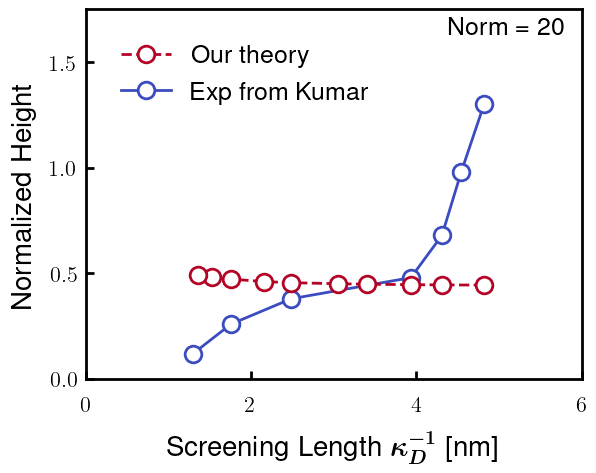

In [37]:
#@title
SrCs = [4, 5, 6, 8, 10, 15, 20, 30, 40, 50] #[1, 2, 3, 4, 5, 6, 8, 10, 15, 20, 30, 40, 50, 75, 100] 
Sr_equil =[8.894385981544685, 8.910354208508307, 8.932826273366489, 8.977580911108763, 9.022003419019882, 9.12210877360746, 9.223764106697933, 9.462206040242537, 9.624580392156863, 9.834722993794589]
#Sr_equil = [36.19401895734597, 31.81323542435424, 28.377395881006862, 25.07629581993569, 16.050486486486488, 9.991462668298654, 9.555869170984455, 9.191064618165386, 5.492755796178344, 5.367826231386024, 5.2014312267657985, 5.089542296436564, 5.010709338453482, 4.88395817354566, 4.811306562193927]
#Sr_meta = [36.19401895734597, 31.81323542435424, 28.377395881006862, 25.07629581993569, 16.050486486486488, 9.991462668298654, 9.555869170984455, 9.191064618165386, 8.499643355392594, 7.995791556728231, 5.2014312267657985, 5.089542296436564, 5.010709338453482, 4.88395817354566, 4.811306562193927]

norm = 20
Sr_equil = np.divide(Sr_equil,  norm)
#Sr_meta = np.divide(Sr_meta, 21.5)
CsDeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in SrCs]

#Sr2014 pH2.4 fitted in Illustrator
x = [4, 4.5, 5, 6, 15, 30, 55]
y = [1.3, 0.98, 0.68, 0.48, 0.38, 0.26, 0.12]
xDeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in x]

f, ax = plt.subplots(1,1)

ax.plot(CsDeb, Sr_equil, 'o--', color=warm_red, mew=2, ms=12, markerfacecolor='w', zorder=3, label="Our theory")
ax.plot(xDeb, y, 'o-', color=cool_blue, mew=2, ms=12, markerfacecolor='w',label="Exp from Kumar")

#ax.plot(CsDeb, Sr_equil, 'k', label="Our Theory")
#ax.plot(CsDeb, Sr_equil, 'r', mew=2.5,ms=12,markerfacecolor='w', zorder=3, label="Our theory")
#ax.plot(CsDeb[:len(Sr_meta)], Sr_meta, 'o-',color="0.6", mew=2.5,ms=12,markerfacecolor='w', zorder=2, label="Metastable")

plt.gca().text(0.85, 0.95, 'Norm = {:d}'.format(norm), transform=plt.gca().transAxes, fontsize=18,
       ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))
ax.set_title(r"")
ax.set_ylim(0, 1.75) #0.5
plt.yticks([0.0, 0.5, 1.0, 1.5])
plt.xticks([0, 2, 4, 6, 8])
ax.set_xlim(0,6) #2

ax.set_xlabel(r'Screening Length $\bm{\kappa_D^{-1}}$'+' [nm]')
ax.set_ylabel('Normalized Height')

leg = ax.legend(loc = 2,frameon=False,fontsize=18)
leg.get_frame().set_linewidth(0.0)

plt.show()

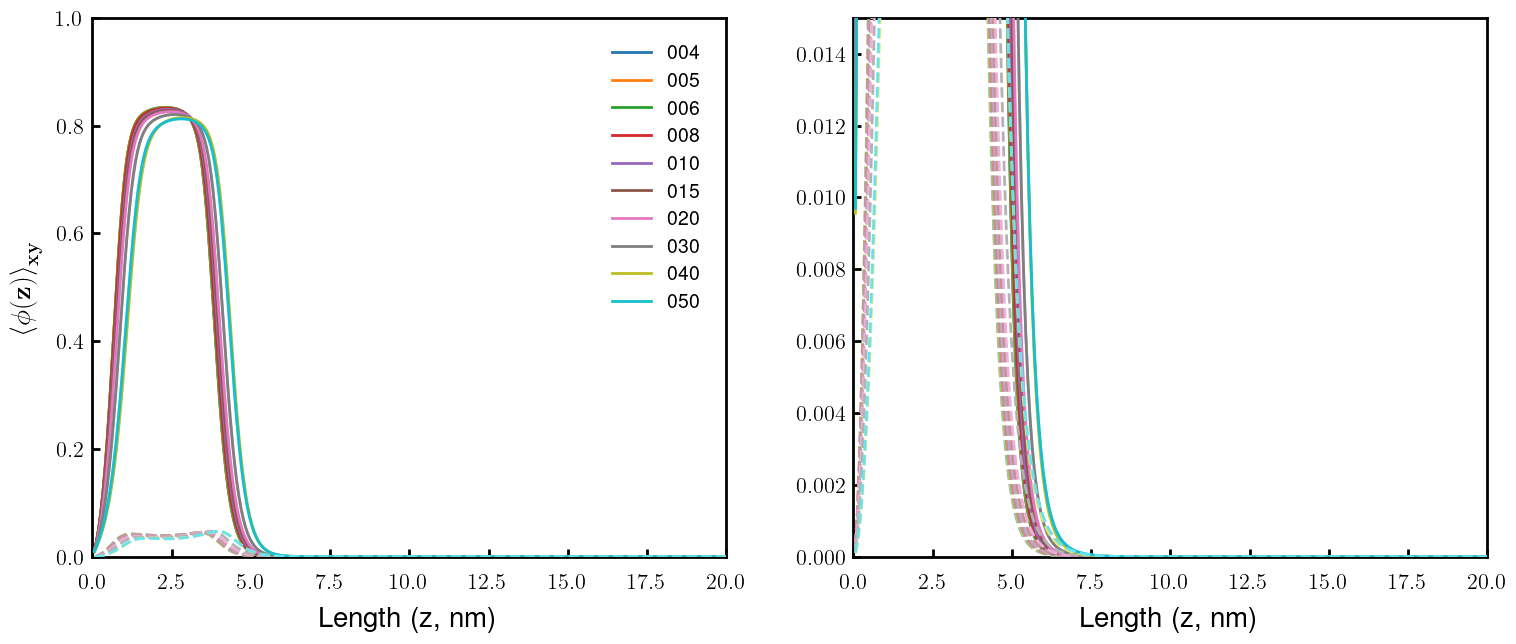

In [ ]:
#@title
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import ticker

read_list = ['004', '005', '006', '008', '010', '015', '020', '030', '040', '050']

div = [0.6]*15 #b0
block_Num = len(read_list)
block_Ni = [[7]]*len(read_list) 
#block_Ni = [[6, 8]]*len(read_list) 
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']
colors_i = [colors[i] for i in range(len(read_list))]

fig, axs = plt.subplots(1,2, figsize=(18,7)) 
#ins = inset_axes(axs[1], width="100%", height="100%", loc="upper right",
#                   bbox_to_anchor=(.66, .30, .32, .3), bbox_transform=axs[1].transAxes)

for k in range(len(read_list)):
  block_Nik = block_Ni[k]

  a = 1
  b = 1
  c = 1
  names = ['rx', 'phA']
  for j in range(len(block_Nik)):
    names += ['phA_T{:d}'.format(a)] +  ['*'*b]+ ['ph{:d}'.format(c+i) for i in range(block_Nik[j])] + ['*'*(b+1)]
    a += 1
    b += 2
    c += block_Nik[j]

  names += ['phB']

  df = pd.read_csv(GIT+"phb14v146_c"+read_list[k]+".dat", sep="\s+", skiprows=0, names=names)
  #df = pd.read_csv("ph_a020c010_"+read_list[k]+"s002.dat", sep="\s+", skiprows=0, names=names)

  Nx = len(df.index)

  for i in range(len(block_Nik)*2):
    names.remove('*'*(i+1))
    df = df.drop('*'*(i+1),axis=1)

  Nx = len(df.index)
  rows = range(0, Nx)

  rows = range(0, Nx)

  phAr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phAr = phAr.fillna(0) # with 0s rather than NaNs
  phAT = pd.DataFrame(data=None, index=rows, columns=range(1+len(block_Nik)), dtype=None, copy=False)
  phAT = phAT.fillna(0) # with 0s rather than NaNs
  ph1r = pd.DataFrame(data=None, index=rows, columns=range(1+sum(block_Nik)), dtype=None, copy=False)
  ph1r = ph1r.fillna(0) # with 0s rather than NaNs

  phB = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phB = phB.fillna(0) # with 0s rather than NaNs

  ph1r = df.loc[:, ['ph{:d}'.format(i+1) for i in range(sum(block_Nik))]]
  ph1r.insert(0, 'rx', df.iloc[:,0])

  phAT = df.loc[:, ['phA_T{:d}'.format(i+1) for i in range(len(block_Nik))]]
  phAT.insert(0, 'rx', df.iloc[:,0])

  for i in range(Nx):
    phAr.iloc[i, 0] = df.iloc[i,0]
    phAr.iloc[i, 1] = df.iloc[i,1] 
    phB.iloc[i, 0] = df.iloc[i, 0]
    phB.iloc[i, 1] = df.iloc[i, 2 + sum(block_Nik) + len(block_Nik)] 

  rshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)
  lshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)
  
  rshi.iloc[1:,0] = phAr.iloc[1:,0]
  lshi.iloc[1:,0] = phAr.iloc[1:,0]
  """
  if     k == 0:
    rshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 0)
    lshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 0)
  elif   k == 1:
    rshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 0)
    lshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 0)
  elif   k == 2: 
    rshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 0.45)
    lshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 0.15)
  elif   k == 3: 
    rshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 2.16)
    lshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 1.78)
  elif   k == 4: 
    rshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 3.92)
    lshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 3.48)
  """
  axs[0].plot(np.multiply(rshi.iloc[1:,0], div[k]), phAr.iloc[1:,1], zorder = 3, alpha=1.0, label=read_list[k])
  axs[1].plot(np.multiply(lshi.iloc[1:,0], div[k]), phAr.iloc[1:,1], zorder = 3, alpha=1.0)
  #ins.plot(np.multiply(lshi.iloc[1:,0], div[k]), phAr.iloc[1:,1], zorder = 3, alpha=1.0, label=read_list[k])
  #ax.plot(Gibbs(phAr, div[k])*np.ones(2), [0, np.max(phAr)[1]], '--')

  step = 1

  for j in range(len(block_Nik)):
    axs[0].plot(np.multiply(phAT.iloc[1:,0], div[k]), phAT.iloc[1:,j+1], '-',  zorder=2, color=tjy.lighten_color(colors_i[k], amount=0.50),label='_Total')
    axs[1].plot(np.multiply(phAT.iloc[1:,0], div[k]), phAT.iloc[1:,j+1], '-',  zorder=2, color=tjy.lighten_color(colors_i[k], amount=0.50),label='_Total')

    for i in range(block_Nik[j]):
      if i == 4 and j == 0: axs[0].plot(np.multiply(ph1r.iloc[1:,0], div[k]), ph1r.iloc[1:,i+step], '--',  zorder=3, color=tjy.lighten_color(colors_i[k], amount=0.60),label='_Block')
      if i == 4: axs[1].plot(np.multiply(ph1r.iloc[1:,0], div[k]), ph1r.iloc[1:,i+step], '--',  zorder=3, color=tjy.lighten_color(colors_i[k], amount=0.60),label='_Block')

    step += block_Nik[j]

conf = [Patch(facecolor=i, edgecolor='k', lw=1.5) for i in colors_i]
conf += [
          Line2D([0], [0], color='k', ls='-'),
          Line2D([0], [0], color='k', ls='--'),
        ]
for i in range(2):
  #axs[i].plot([0,50], np.ones(2)*1e-4, '--k')
  axs[0].set_ylabel(r'$\bf{\langle\phi(z)\rangle}_{xy}$')
  axs[i].set_xlabel("Length (z, nm)")
  axs[i].set_yscale('linear')

axs[0].set_ylim(0, 1.0)
axs[1].set_ylim(0, 0.015)
axs[0].set_xlim(0, 20)
axs[1].set_xlim(0, 20)
#ins.set_ylim(0, 0.8)
#ins.set_xlim(0, 45)


#plt.gca().text(0.50, 0.95, 'B block dashed', transform=plt.gca().transAxes, fontsize=18,
#        ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))

#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(0.05))
#conf_new = [
#              Patch(facecolor='C0', edgecolor='k', lw=1.5),
#              Patch(facecolor='C1', edgecolor='k', lw=1.5),
#              Patch(facecolor='C2', edgecolor='k', lw=1.5),
#]
#leg = plt.legend(conf_new, ['0.6 nm', '0.8 nm', '1.0 nm'], loc='upper right')
leg = axs[0].legend(loc=1)
leg.get_frame().set_linewidth(3.0)

#ins.set_yscale('log')
#ins.set_ylim(1e-10, 0.1)
#ins.yaxis.set_minor_locator(MultipleLocator(0.05))
#ins.set_xlim(0, 20)

#formatter = ticker.ScalarFormatter(useMathText=True)
#formatter.set_scientific(True) 
#formatter.set_powerlimits((-1,1)) 
#ins.yaxis.set_major_formatter(formatter) 


#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [ ]:
tjy.plot_anim(GIT+'it_a021c004_x110s002.dat', simname = GIT+'SIM.dat', lx=200)

it len  3188
nframes calc  3188
phn len  3188


Animation size has reached 21287823 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


In [ ]:
#@title
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import ticker

read_list = ['100', '75', '50'] 

div = [1.0]*11 #b0
block_Num = len(read_list)
block_Ni = [[5]]*len(read_list) 
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']
#['C0']*6 + ['C1']*6 + ['C2']*6
#['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C0', 'C1', 'C2', 'C3', 'C4', 'C5']
colors_i = [colors[i] for i in range(len(read_list))]

fig, axs = plt.subplots(1,2, figsize=(25,7)) 
axh = axs[0].twinx()
axpsi = axs[1].twinx()
#ins = inset_axes(axs[1], width="100%", height="100%", loc="upper right",
#                   bbox_to_anchor=(.66, .30, .32, .3), bbox_transform=axs[1].transAxes)

for k in range(len(read_list)):
  block_Nik = block_Ni[k]

  a = 1
  b = 1
  c = 1
  names = ['rx', 'phA']
  for j in range(len(block_Nik)):
    names += ['phA_T{:d}'.format(a)] +  ['*'*b]+ ['ph{:d}'.format(c+i) for i in range(block_Nik[j])] + ['*'*(b+1)]
    a += 1
    b += 2
    c += block_Nik[j]

  names += ['phB']

  start = "_lx"
  end = ""
  df = pd.read_csv("ph"+start+read_list[k]+end+".dat", sep="\s+", skiprows=0, names=names)
  dfe = dfe = pd.read_csv("el"+start+read_list[k]+end+".dat",
                 sep="\s+", 
                 skiprows=0, 
                 names=['rx','psi','elplus','elminus','elpolymer'])

  Nx = len(df.index)

  for i in range(len(block_Nik)*2):
    names.remove('*'*(i+1))
    df = df.drop('*'*(i+1),axis=1)

  Nx = len(df.index)
  rows = range(0, Nx)

  elr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  elr = elr.fillna(0) # with 0s rather than NaNs
  ohr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  ohr = ohr.fillna(0) # with 0s rather than NaNs
  hr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  hr = hr.fillna(0) # with 0s rather than NaNs
  for i in rows:
    elr.iloc[i, 0] = dfe.iloc[i, 0]
    elr.iloc[i, 1] = dfe.iloc[i, 1]
    ohr.iloc[i, 0] = dfe.iloc[i, 0]
    ohr.iloc[i, 1] = dfe.iloc[i, 2]
    hr.iloc[i,  0] = dfe.iloc[i, 0]
    hr.iloc[i,  1] = dfe.iloc[i, 3]

  phAr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phAr = phAr.fillna(0) # with 0s rather than NaNs
  phAT = pd.DataFrame(data=None, index=rows, columns=range(1+len(block_Nik)), dtype=None, copy=False)
  phAT = phAT.fillna(0) # with 0s rather than NaNs
  ph1r = pd.DataFrame(data=None, index=rows, columns=range(1+sum(block_Nik)), dtype=None, copy=False)
  ph1r = ph1r.fillna(0) # with 0s rather than NaNs

  phB = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phB = phB.fillna(0) # with 0s rather than NaNs

  ph1r = df.loc[:, ['ph{:d}'.format(i+1) for i in range(sum(block_Nik))]]
  ph1r.insert(0, 'rx', df.iloc[:,0])

  phAT = df.loc[:, ['phA_T{:d}'.format(i+1) for i in range(len(block_Nik))]]
  phAT.insert(0, 'rx', df.iloc[:,0])

  for i in range(Nx):
    phAr.iloc[i, 0] = df.iloc[i,0]
    phAr.iloc[i, 1] = df.iloc[i,1] 
    phB.iloc[i, 0] = df.iloc[i, 0]
    phB.iloc[i, 1] = df.iloc[i, 2 + sum(block_Nik) + len(block_Nik)] 

  rshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)
  lshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)
  
  rshi.iloc[1:,0] = phAr.iloc[1:,0]
  lshi.iloc[1:,0] = phAr.iloc[1:,0]
  """
  if     k == 0:
    rshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 0)
    lshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 0)
  elif   k == 1:
    rshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 0)
    lshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 0)
  elif   k == 2: 
    rshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 0.45)
    lshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 0.15)
  elif   k == 3: 
    rshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 2.16)
    lshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 1.78)
  elif   k == 4: 
    rshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 3.92)
    lshi.iloc[1:,0] = np.add(phAr.iloc[1:,0], 3.48)
  """
  l1, = axs[0].plot(np.multiply(rshi.iloc[1:,0], div[k]), phAr.iloc[1:,1], zorder = 3, alpha=1.0)
  l2, = axh.plot(ohr.iloc[1:, 0], -1*np.log10(ohr.iloc[1:, 1]/ 6.022e-1), ls=":")
  l3, = axh.plot(hr.iloc[1:, 0], -1*np.log10(hr.iloc[1:, 1]/ 6.022e-1), ls=":")

  r1, = axs[1].plot(np.multiply(lshi.iloc[1:,0], div[k]), phAr.iloc[1:,1], zorder = 3, alpha=1.0, label=read_list[k])
  r2, = axpsi.plot(elr.iloc[1:,0], elr.iloc[1:,1], label=r"$\psi$  "+read_list[k], ls="--")
  
  #ins.plot(np.multiply(lshi.iloc[1:,0], div[k]), phAr.iloc[1:,1], zorder = 3, alpha=1.0, label=read_list[k])
  #ax.plot(Gibbs(phAr, div[k])*np.ones(2), [0, np.max(phAr)[1]], '--')

  step = 1

  for j in range(len(block_Nik)):
    axs[1].plot(np.multiply(phAT.iloc[1:,0], div[k]), phAT.iloc[1:,j+1], '-',  zorder=2, color=tjy.lighten_color(colors_i[k], amount=0.00),label='_Total')

    #for i in range(block_Nik[j]):
      #axs[0].plot(np.multiply(ph1r.iloc[1:,0], div[k]), ph1r.iloc[1:,i+step], '--',  zorder=3, color=tjy.lighten_color(colors_i[k], amount=0.60),label='_Block')
      #if (i==4 or i == 3): axs[1].plot(np.multiply(ph1r.iloc[1:,0], div[k]), ph1r.iloc[1:,i+step], '--',  zorder=3, color=tjy.lighten_color(colors_i[k], amount=0.60),label='_Block')

    step += block_Nik[j]

conf = [Patch(facecolor=i, edgecolor='k', lw=1.5) for i in colors_i]
conf += [
          Line2D([0], [0], color='k', ls='-'),
          Line2D([0], [0], color='k', ls='--'),
        ]

axs[0].set_ylabel(r'$\bf{\langle\phi(z)\rangle}_{xy}$')
axpsi.set_ylabel(r"$\psi$")
axh.set_ylabel(r"$p[O]H \equiv -\log_{10}(C_\pm)$")
for i in range(2):
  #axs[i].plot([0,50], np.ones(2)*1e-4, '--k')
  axs[i].set_xlabel("Length (z, nm)")
  axs[i].set_yscale('linear')


axs[0].set_ylim(0, 0.6)
axs[1].set_ylim(0, 0.6)
axpsi.set_ylim(0, None)
axs[0].set_xlim(0, 100)
axs[1].set_xlim(0, 100)
#ins.set_ylim(0, 0.8)
#ins.set_xlim(0, 45)


#plt.gca().text(0.50, 0.95, 'B block dashed', transform=plt.gca().transAxes, fontsize=18,
#        ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))

#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(0.05))
#conf_new = [
#              Patch(facecolor='C0', edgecolor='k', lw=1.5),
#              Patch(facecolor='C1', edgecolor='k', lw=1.5),
#              Patch(facecolor='C2', edgecolor='k', lw=1.5),
#]
#leg = plt.legend(conf_new, ['0.6 nm', '0.8 nm', '1.0 nm'], loc='upper right')
leg1 = axs[0].legend([l1, l2, l3], ["polym", "OH", "H"], loc=1)
leg2 = axs[1].legend([r1, r2], ["polym", "psi"], loc=1)
leg1.get_frame().set_linewidth(3.0)
leg2.get_frame().set_linewidth(3.0)

#ins.set_yscale('log')
#ins.set_ylim(1e-10, 0.1)
#ins.yaxis.set_minor_locator(MultipleLocator(0.05))
#ins.set_xlim(0, 20)

#formatter = ticker.ScalarFormatter(useMathText=True)
#formatter.set_scientific(True) 
#formatter.set_powerlimits((-1,1)) 
#ins.yaxis.set_major_formatter(formatter) 

#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [4]:
"""def Gibbs(phAr, b0):
  dx = (phAr.iloc[1,0] - phAr.iloc[0, 0]) * b0 #Assuming equally spaced
  maxpt = np.argmax(phAr.iloc[:,1])

  sum = 0
  for i in range(maxpt, np.max(phAr.index)):
    sum += phAr.iloc[i, 1]
  sum *= dx 

  rGibbs =  sum / phAr.iloc[maxpt, 1] + phAr.iloc[maxpt, 0] *b0

  return rGibbs""";

In [6]:
def Gibbsf(filename, b0):
  df = pd.read_csv(filename, sep="\s+", skiprows=0)
  Nx = len(df.index)
  rows = range(0, Nx)

  phA = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phA = phA.fillna(0) # with 0s rather than NaNs

  for i in range(Nx):
    phA.iloc[i, 0] = df.iloc[i,0] * b0
    phA.iloc[i, 1] = df.iloc[i,1] 

  dx = (phA.iloc[1,0] - phA.iloc[0, 0]) #Assuming equally spaced
  maxpt = np.argmax(phA.iloc[:,1])

  sum = 0
  for i in range(maxpt, np.max(phA.index)):
    sum += phA.iloc[i, 1]
  sum *= dx 

  rGibbs =  sum / phA.iloc[maxpt, 1] + phA.iloc[maxpt, 0]

  return rGibbs

In [7]:
read_list = ['0506_01','0506_02','0506_03','d_04','0506_045','0506_05','d_06','d_08', '0506_15','0506_30','0506_50']  #['01','02','03','04','05','10','20','30','40','50']  #['000', '010', '020', '030', '040', '050','060','070','080','090', '100'] #['01','02','03','04','045','05','06','15','30','50'] 
read_list = ['ph'+i+'.dat' for i in read_list]

print("[", end="")
for i in range(len(read_list)): 
  print(Gibbsf(read_list[i], 0.6), end="")
  if i!=(len(read_list)-1): print(", ", end="")
print("]")

[

FileNotFoundError: [Errno 2] No such file or directory: 'ph0506_01.dat'

In [8]:
read_list = ['040', '050', '060', '070', '075', '080', '085', '090', '095', '100', '105', '110', '115', '120', '125',
              '130', '135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200']
x = [float(i)/100 for i in read_list]
read_list = ['p1a0_x'+i+'.dat' for i in read_list]
H = [Gibbsf(i, 1.0) for i in read_list]

FileNotFoundError: [Errno 2] No such file or directory: 'p1a0_x040.dat'

In [9]:
plt.plot(x, H, 'o')

NameError: name 'H' is not defined

In [ ]:
#@title Old plotting
lx = 300
dx = 17/150
if lx == 100 or lx == 300 or lx == 275 or lx == 350: nx = int(np.floor(lx / dx))
else: nx = int(np.ceil(lx/dx))

## Unknown bug: 
# for lx = 100, nx = np.floor, z = np.arange(...(lx-dx)/b0)
# for lx = 125, 150, nx = np.ceil,  z = np.arange(...(lx)/b0)

## Iteration sim:
itname = 'it_a021c006_x124s002.dat'
# itname = 'it_a030c010_x115s002.dat'
df = pd.read_csv(itname, sep="\s+", skiprows=0, header=None)
## len it does not match len SIM.dat
print("it len ", np.size(df,0))

phname = 'SIM.dat' 
ph = pd.read_csv(phname, sep="\s+", skiprows=0, header=None).to_numpy()
nframes = np.min([int(len(df)), int(len(ph)/nx)])
print("nframes calc ", nframes)
phn = np.reshape(ph, (int(len(ph)/nx), nx))
print("phn len ", np.size(phn, 0))

# %matplotlib inline

# create a figure and axes
fig = plt.figure(figsize=(15, 9))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(2,4,3)
ax3 = plt.subplot(2,4,4)
ax4 = plt.subplot(2,2,4)
plt.subplots_adjust(hspace=0.40)
plt.subplots_adjust(wspace=0.35)

# set up the subplots as needed
ax1.set_xlim(( 0, 10))            
ax1.set_ylim((0, 1.0))
ax1.set_xlabel('z/b')
ax1.set_ylabel(r'$\langle\phi_p(z)\rangle_{xy}$')
            
ax3.set_ylim((1e-6, 1))
ax3.set_xlim((0, 100))
ax3.set_xlabel('it')
ax3.set_title('inCompMax')
ax3.set_yscale('log')
ax3.plot([0,5e5], np.ones(2)*2e-6, ':r')
            
ax2.set_ylim((1e-10, 1))
ax2.set_xlim((0, 100))
ax2.set_xlabel('it')
ax2.set_title('freeDiff')
ax2.set_yscale('log')
ax2.plot([0,5e5], np.ones(2)*1e-9, ':r')

ax4.set_ylim((5e-4, 1))
ax4.set_xlim((0, 100))
ax4.set_xlabel('it')
ax4.set_title('andErr')
ax4.set_yscale('log')
ax4.plot([0,5e5], np.ones(2)*1e-3, ':r')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'k')     # ax.plot returns a list of 2D line objects
line2, = ax2.plot([], [], 'r')
line3, = ax3.plot([], [], 'b')
line4, = ax4.plot([], [], 'g')

## Comment to preview subplots
plt.close()

# animation function. This is called sequentially
def drawframe(n):
  nskip = nframes/100
  n = round(n * nskip)
  if n > nframes - 1: n = nframes-1
  b0 = 1.0
  if lx == 100 or lx ==300 or lx==275 or lx == 350: z = np.arange(0, (lx-dx)/b0, dx)
  else: z = np.arange(0, (lx)/b0, dx)
  pha = phn[n,:]

  x  = df.iloc[:n,0]
  y1 = df.iloc[:n,2]
  y2 = df.iloc[:n,3]
  y3 = df.iloc[:n,4]
  line1.set_data(z, pha)
  line2.set_data(x, y1)
  line3.set_data(x, y2)
  line4.set_data(x, y3)

  ax1.set_ylim(0, max(pha)*1.2)
  if not x.empty: 
    txt_title.set_text('it = {0:4d}'.format(x[n-1]))
    ax2.set_xlim(0, max(x)*1.1)
    ax3.set_xlim(0, max(x)*1.1)
    ax4.set_xlim(0, max(x)*1.1)
  if not y1.empty: ax3.set_ylim(1e-6,  max(y2)*1.5)
  if not y2.empty: ax2.set_ylim(1e-10, max(y1)*1.5)
  if not y3.empty: ax4.set_ylim(5e-4,  max(y3)*1.5)
  return (line1,line2) 

In [ ]:
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=100, blit=True)
rc('animation', html='jshtml')
anim

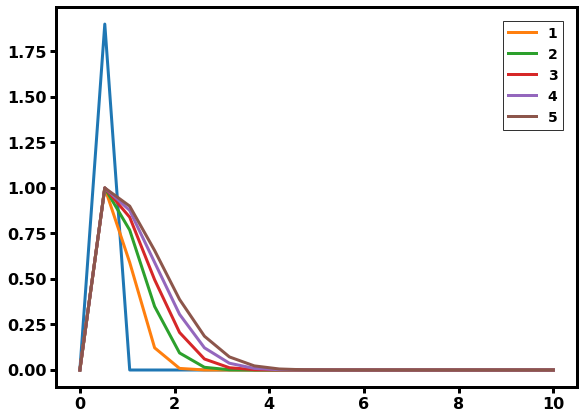

In [ ]:
plt.figure()
x = np.linspace(0,10,20)
dx = x[1]-x[0]
y = [0] + [1/dx]+[0]*(len(x)-2)
plt.plot(x, y)

for i in [1, 2, 3, 4, 5]:
  yg = np.exp(-(x-x[1])**2/(i*dx))
  yg[0] = 0    
  plt.plot(x, yg, label=i)
plt.legend()
plt.show()